#__Regresión Lineal__

##__Principios generales__

Nuestro objetivo es lograr predecir el valor cuantitativo de una variable de respuesta $Y$ a partir de $n$ predictores $X_1, X_2, \dots , X_n$. Suponemos que existe una relación entre $Y$ y $X = (X_1, X_2, \dots , X_n)$. Esto puede se escrito como:

$$h_\theta(X) = f(X) + ϵ$$

donde $f(X)$ e suna función desconocida y $ϵ$ es el término que representa el error aleatorio el cual es independiente de $X$ y tiene media $0$. En el caso de la regresión lineal supondremos que las relación entre $X$ y $Y$ es de tipo lineal y por lo tanto se puede expresar como:


$$h_\theta(X) ≈ \theta_0 + \theta_1X$$

In [ ]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns

Supongamos que la relación real entre un conjunto de datos es de tipo lineal y está dada por la función  $f(x)= \frac{5}{2}x$ y que $ϵ$ sigue una distribución noral con $\mu = 0$ y $σ$ = 10. Al generar una muestra aleatoria de tamaño $100$ en el intervalo $[-2,2]$ obtendríamos los siguientes valores:

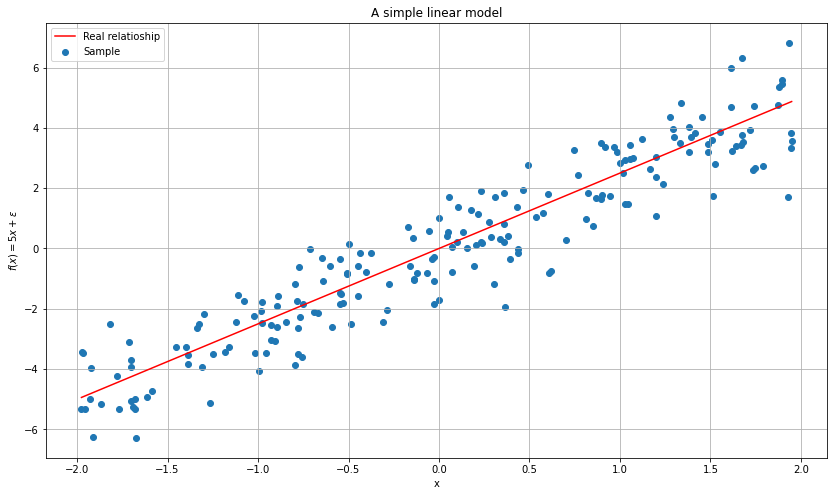

In [ ]:
f = lambda x :  2.5 * x 
sample_size = 200
mu = 0
std = 1.0

X = np.random.uniform(-2, 2, sample_size)
X.sort()
Y = np.array([f(x) + np.random.normal(mu, std) for x in X])


plt.figure(figsize=(14, 8))
plt.scatter(X, Y, label='Sample')
plt.plot(X, [f(i) for i in X], color='r', label='Real relatioship')
plt.xlabel('x')
plt.ylabel('$f(x) = 5x + \epsilon$')
plt.grid()
plt.legend()
plt.title('A simple linear model')
plt.show()

Veamos como cambia la distribución de puntos en la medida que camiba la varianza

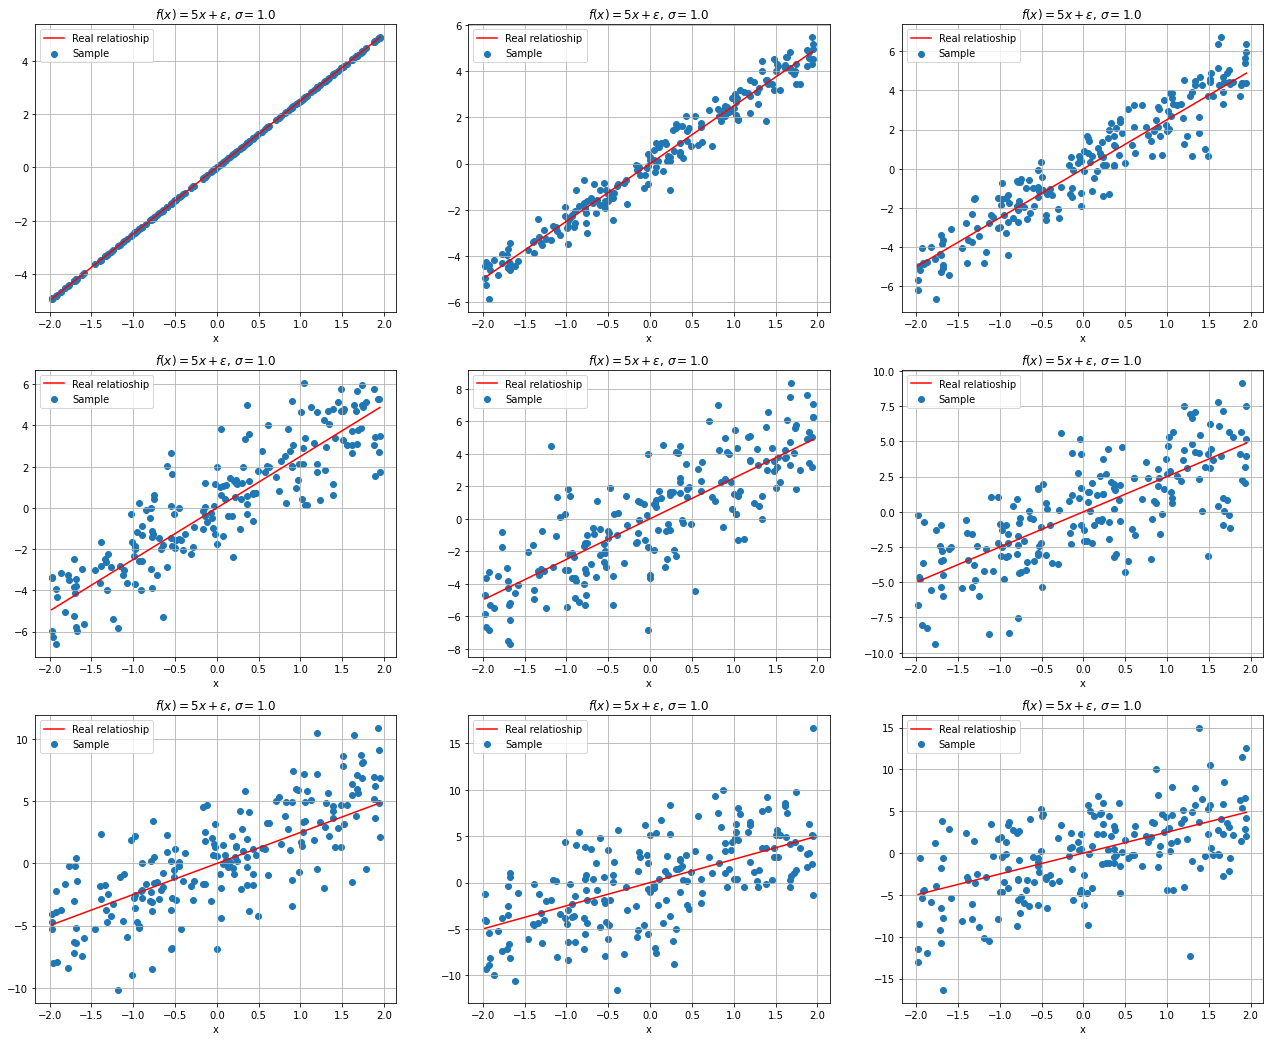

In [ ]:
fig, axes = plt.subplots(3, 3,  figsize=(22,18))

cells = [(i,j) for i in range(3) for j in range(3)]
std_ = 0

for i, j in cells:
  Y_ = np.array([f(x) + np.random.normal(mu, std_) for x in X])
  axes[i][j].scatter(X, Y_, label='Sample')
  axes[i][j].plot(X, [f(i) for i in X], color='r', label='Real relatioship')
  axes[i][j].set_xlabel('x')
  axes[i][j].set_title(f'$f(x) = 5x + \epsilon$, $\sigma = {round(std, 2)}$')
  axes[i][j].grid()
  axes[i][j].legend()
  std_ += 0.5
plt.show()

##__Regresión lineal desde cero__#

### __Gradiente descendente__

El objetivo del gradiente descendente es minimizar el valor de la función de costo

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2$$
donde la hipóstesis $h_{\theta}(x)$ está representada por:


 $$h_{\theta}(x)=  \theta^{T}X = \theta_{0} + \theta_{1}x_1$$

Recuerde que los parámetros de nuestro modelo son los valores de $\theta$. Estos valores se iran ajustando en la medida que se minimiza $J(\theta)$. Actualizaremos los valores de $\theta_j$ de manera iterativa con: 

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})\cdot x_j^{(i)}$$

Es importante actualizar los valores de $\theta_j$ de manera simultanea. De esta forma, en cada paso del gradiente descendente irá aproximando $\theta_j$ a  los valor óptimos. 

__Nota:__ Cada uno de los datos de la muestra se almacenará como una fila de la matrix $X$. Para poder manipular el intercepto  ($\theta_0$) se agregará una fila adicional de unos. Esto permitirá manipular $X_0$ como si fuera otra variable del modelo fija en 1.




In [ ]:
# Agregando una columna adicional de unos para el intercepto
m = sample_size  
X = X.reshape(-1,1)
X = np.hstack((np.ones((m, 1)),X))  

# Inicializamos los valores de los coeficientes           
theta = np.array([75.0, -75.0])                                

Definamos la función de costo $J(\theta)$

In [ ]:
def compute_cost(x, y, theta):
  
    m = len(y)
    J = np.sum(np.square(x.dot(theta) - y)) / (2.0 * m)
    return J

In [ ]:
cost = compute_cost(X, Y, theta)
print('The cost on initial theta:', cost)

The cost on initial theta: 6289.135381181151


In [ ]:
def gradient_descent(X, Y, theta, alpha=0.01, num_iters=1500, epsilon=0.001):

    m = len(Y)
    J_history = list()
    theta_history = list()
    
    for i in range(num_iters):
      if((i > 1) and (abs(J_history[i-1] - J_history[i-2]) <= epsilon)):
        break
      theta -= alpha / m * ((X.dot(theta) - Y).T.dot(X))
      theta_history.append(theta.copy())
      J_history.append(compute_cost(X, Y, theta))
    
    return theta.copy(), J_history, theta_history

Al probar los métodos implementados obtenermos los siguientes valores para los coeficientes

In [ ]:
theta, J_history, theta_history = gradient_descent(X, Y, theta)
print ("Theta computed from gradient descent:", theta)

Theta computed from gradient descent: [0.15677885 2.35433106]


Visualizando la función de costo $J(\theta)$

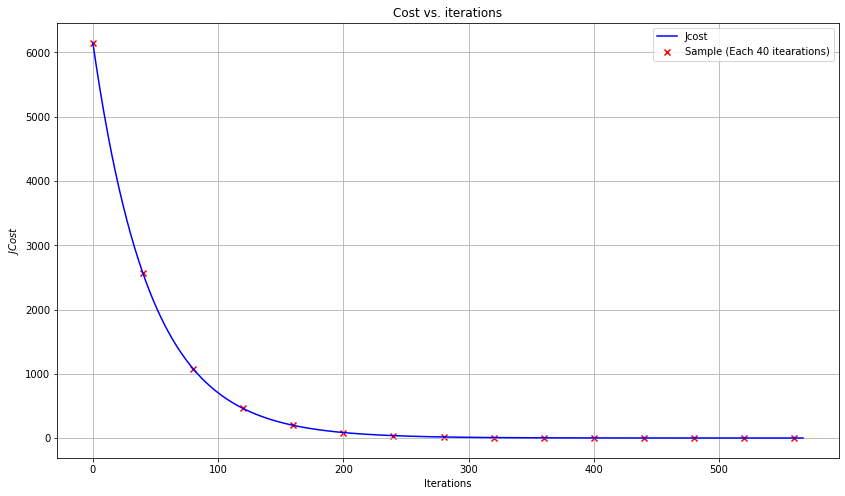

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot([i for i in range(len(J_history))], J_history, linestyle='-', color='b', label='Jcost')
plt.scatter([i for i in range(0, len(J_history), 40)], J_history[:len(J_history): 40], marker='x', color='r', label='Sample (Each 40 itearations)')
plt.xlabel('Iterations')
plt.ylabel('$JCost$')
plt.legend()
plt.title("Cost vs. iterations")
plt.grid()

Visualizando los cambios de la función obtenida.

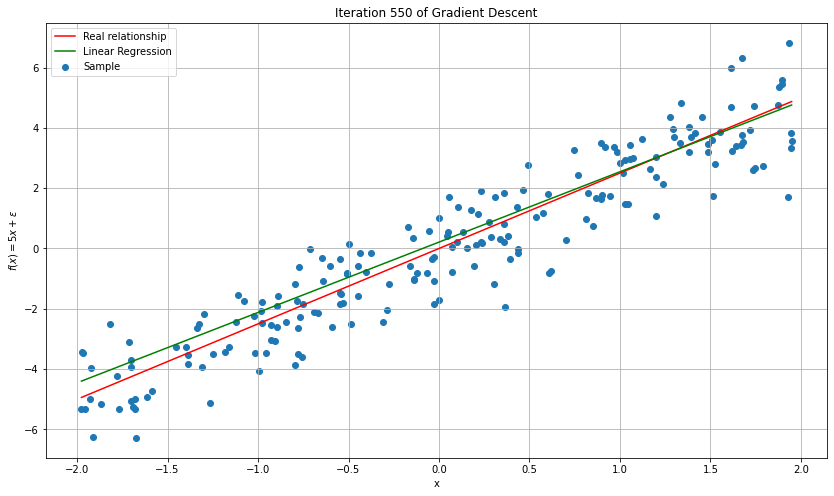

In [ ]:
from IPython.display import clear_output

for i in range(100, len(theta_history), 30):
  plt.figure(figsize=(14, 8))
  clear_output(wait=True)
  plt.scatter(X[:, 1], Y, label='Sample')
  plt.plot(X[:, 1], [f(i) for i in X[:, 1]], color='r', label='Real relationship')
  plt.plot(X[:, 1], X.dot(theta_history[i]), color='green', label='Linear Regression')
  plt.xlabel('x')
  plt.ylabel('$f(x) = 5x + \epsilon$')
  plt.grid()
  plt.legend()
  plt.title(f'Iteration {i} of Gradient Descent')
  plt.pause(0.05)

Visualizando Los residuos del modelo obtenido

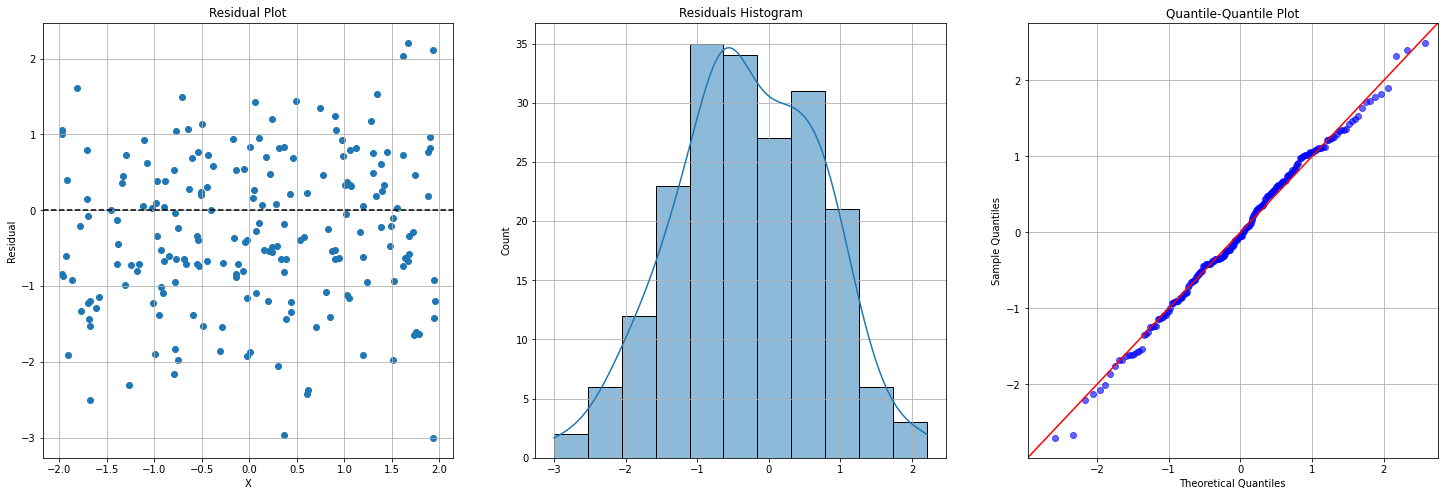

In [ ]:
from statsmodels.api import qqplot

fig, axes = plt.subplots(1, 3, figsize=(25, 8))

y_predicted = X.dot(theta)
residual = Y - y_predicted

axes[0].axhline(y=0, color='black', linestyle='--')
axes[0].scatter(X[:, 1], residual)
axes[0].set_title('Residual Plot')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Residual')
axes[0].grid()

axes[1].grid()
sns.histplot(residual, kde=True, ax=axes[1]).set(title='Residuals Histogram')

axes[2].set_title('Quantile-Quantile Plot')
axes[2].grid()
qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[2], alpha= 0.6)
plt.show()

Visualizando $J(\theta)$

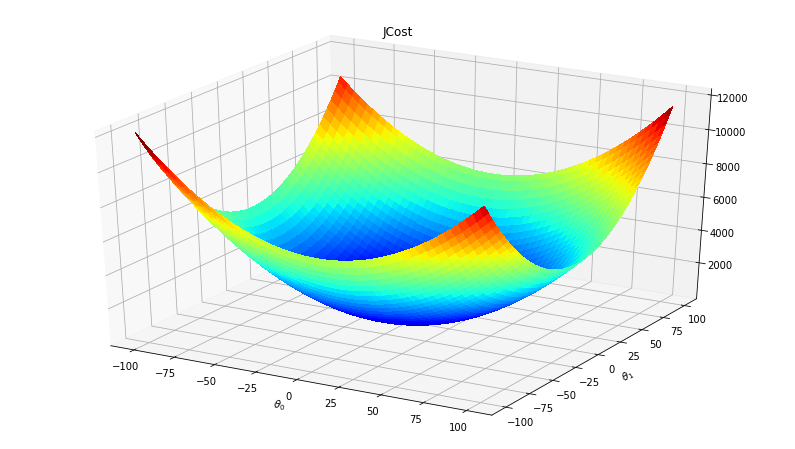

In [ ]:
# Grid over which we will calculate J

theta0_vals = np.linspace(-100, 100, 100)
theta1_vals = np.linspace(-100, 100, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out j_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X, Y, t)

# We need to transpose J_vals before calling plot_surface, or else the axes will be flipped.
J_vals = J_vals.T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Surface plot
fig = plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=2, cstride=2, cmap=cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('JCost')
plt.show()


Visualizando los contornos de $J(\theta)$

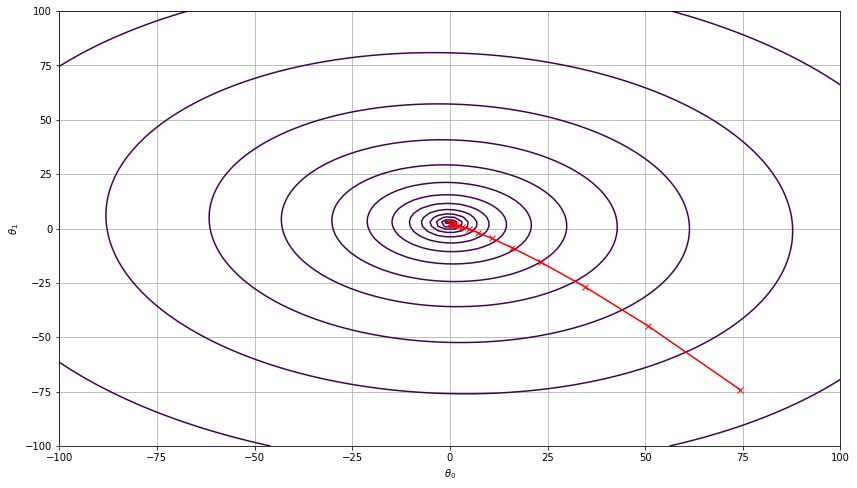

In [ ]:
theta_x = [x[0] for x in theta_history]
theta_y = [x[1] for x in theta_history]

plt.figure(figsize=(14, 8))

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 7, 30))
plt.plot(theta_x[::40], theta_y[::40], linestyle='-', marker='x', color='r')
plt.plot(theta_x[-1], theta_y[-1], linestyle='-', marker='x', color='r')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.grid()
plt.show()

#__Regresión lineal - Sckit-Learn__

Una idea general de como funciona sckit-learn:

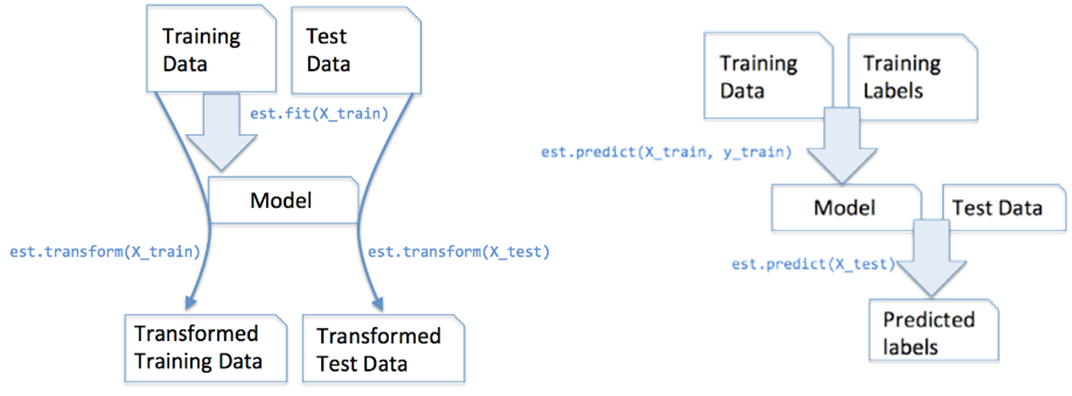

Veamos un ejemplo utilizando la clase `LinearRegression` la cual utiliza mínimos cuadrados ordinarios.

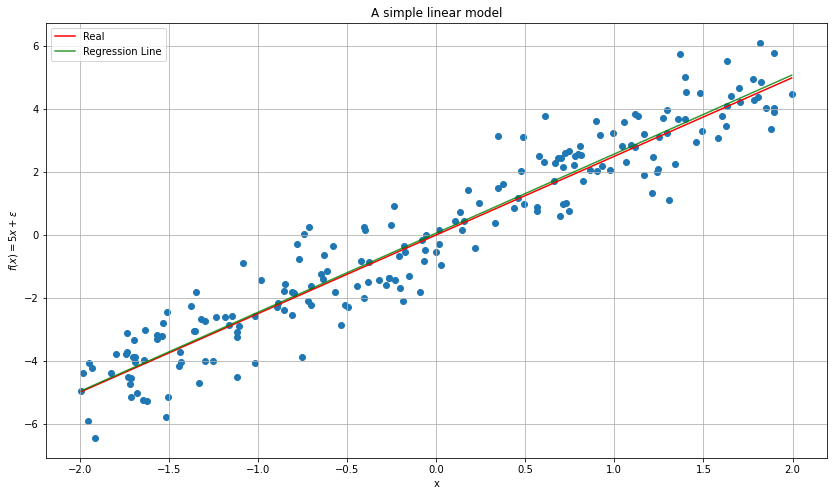

In [ ]:
from sklearn.linear_model import LinearRegression

f = lambda x :  2.5 * x 
sample_size = 200
X = np.random.uniform(-2, 2, sample_size)
X.sort()

Y = np.array([f(x) + np.random.normal(mu,std) for x in X])
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

lr = LinearRegression()
lr.fit(X, Y)
y_pred = lr.predict(X)

plt.figure(figsize=(14, 8))
plt.scatter(X, Y)
plt.plot(X, [f(i) for i in X], color='r', label='Real')
plt.plot(X, y_pred, color='green', alpha= 0.8, label='Regression Line')
plt.xlabel('x')
plt.ylabel('$f(x) = 5x + \epsilon$')
plt.grid()
plt.legend()
plt.title('A simple linear model')
plt.show()

Visualizando el gráfico de residuos

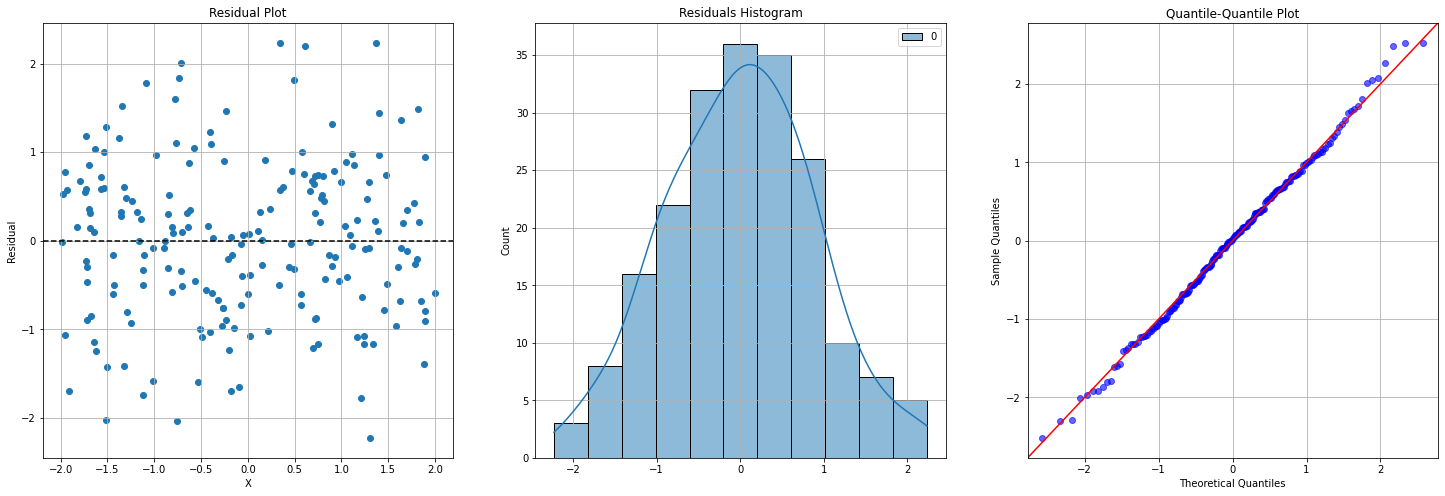

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

residual = Y - y_pred

axes[0].axhline(y=0, color='black', linestyle='--')
axes[0].scatter(X, residual)
axes[0].set_title('Residual Plot')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Residual')
axes[0].grid()

axes[1].grid()
sns.histplot(residual, kde=True, ax=axes[1]).set(title='Residuals Histogram')

axes[2].set_title('Quantile-Quantile Plot')
axes[2].grid()
qqplot(np.sort(residual.flatten()), fit=True, line="45", ax=axes[2], alpha= 0.6)
plt.show()

También es posible utilizar sckit-learn para calcular las métricas de desempeño disponibles para regresión

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

train_score = lr.score(X, Y)
print("Coefficient of determination in the training set: ", train_score)
print('MAE:', mean_absolute_error(Y, y_pred))
print('MSE:', mean_squared_error(Y, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y, y_pred)))

Coefficient of determination in the training set:  0.9142529386957724
MAE: 0.7105494528407794
MSE: 0.7837765371616772
RMSE: 0.8853115480787976


También es posible utilizar la clase `SGDRegressor` si queremos utilizar el algoritmo de gradiente descendete para problemas de regresión.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


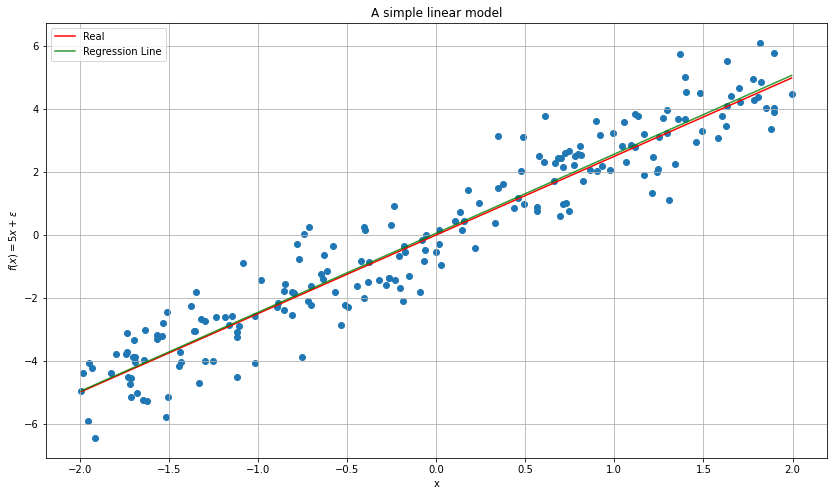

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1500, tol=1e-3)

sgd.fit(X, Y)
y_pred = sgd.predict(X)

plt.figure(figsize=(14, 8))
plt.scatter(X, Y)
plt.plot(X, [f(i) for i in X], color='r', label='Real')
plt.plot(X, y_pred, color='green', alpha= 0.8, label='Regression Line')
plt.xlabel('x')
plt.ylabel('$f(x) = 5x + \epsilon$')
plt.grid()
plt.legend()
plt.title('A simple linear model')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

train_score = lr.score(X, Y)
print("Coefficient of determination in the training set: ", train_score)
print('MAE:', mean_absolute_error(Y, y_pred))
print('MSE:', mean_squared_error(Y, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y, y_pred)))

Coefficient of determination in the training set:  0.9142529386957724
MAE: 0.7104992303034426
MSE: 0.7837908953240121
RMSE: 0.8853196571431203
